<a href="https://colab.research.google.com/github/onertartan/CV-Mnist/blob/main/Mnist_csv_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
mnist_directory = "drive/MyDrive/Data/mnist-csv"
os.listdir(mnist_directory)

['mnist_test.csv', 'mnist_train.csv']

In [ ]:
import pandas as pd
df_train = pd.read_csv( os.path.join(mnist_directory,"mnist_train.csv")  )
df_val = pd.read_csv( os.path.join(mnist_directory,"mnist_test.csv")  )
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape,df_val.shape

((60000, 785), (10000, 785))

In [ ]:
x_train, y_train = df_train.iloc[:,1:].to_numpy(), df_train.iloc[:,0].to_numpy()
x_val, y_val = df_val.iloc[:,1:].to_numpy(), df_val.iloc[:,0].to_numpy()
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [ ]:
x_train= x_train/ 255
x_val = x_val/ 255


In [ ]:
del df_train, df_val
#%whos

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  =  train_test_split( x_train, y_train, test_size = 1/6)
x_train.shape, x_test.shape

((50000, 784), (10000, 784))

### CREATE, COMPILE, FIT MODEL

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import L2


In [ ]:
model = Sequential([Dense(128, activation = "relu"),
                    Dense(64, activation ="relu"),
                    Dense(10)])
model.compile(optimizer = Adam(0.001), loss = SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
history = model.fit(x_train,y_train, epochs = 30, validation_data=(x_val,y_val))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4526 - accuracy: 0.9191 - val_loss: 0.2916 - val_accuracy: 0.9568
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2764 - accuracy: 0.9570 - val_loss: 0.2482 - val_accuracy: 0.9597
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2392 - accuracy: 0.9628 - val_loss: 0.2388 - val_accuracy: 0.9610
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2169 - accuracy: 0.9667 - val_loss: 0.2108 - val_accuracy: 0.9668
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2011 - accuracy: 0.9698 - val_loss: 0.1997 - val_accuracy: 0.9690
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1890 - accuracy: 0.9720 - val_loss: 0.1937 - val_accuracy: 0.9690
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1819 - accuracy: 0.9724 - val_loss: 0.1899 - val_accuracy:

### VISUALIZE LEARNING CURVE

In [ ]:
epochs = (range(1,len(history.history["loss"])+1))

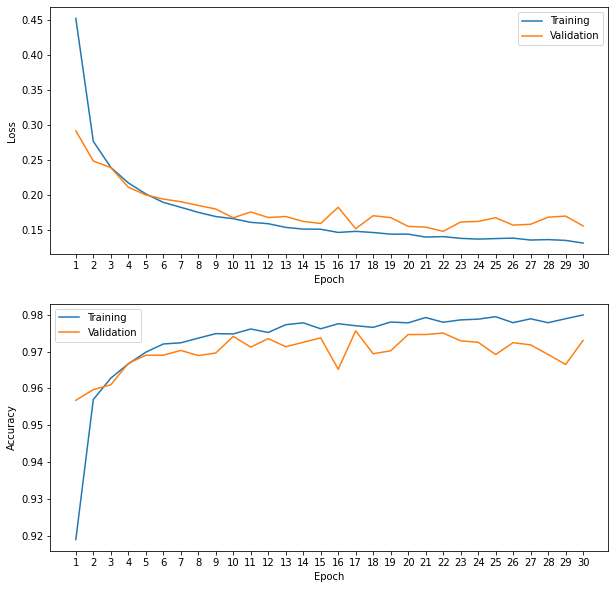

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1,len(history.history["loss"])+1) 
fig, (ax1,ax2) = plt.subplots(2,figsize=(10, 10))
ax1.plot(epochs,history.history["loss"],epochs,history.history["val_loss"])
ax1.set( xlabel="Epoch",ylabel='Loss')
ax1.set_xticks(epochs) 
ax1.legend(["Training","Validation"])
ax2.plot(epochs,history.history["accuracy"],epochs,history.history["val_accuracy"])
ax2.set( xlabel="Epoch",ylabel='Accuracy')
ax2.set_xticks(epochs) 
ax2.legend(["Training","Validation"])
plt.show()


### EVALUATE MODEL

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1645 - accuracy: 0.9697


In [ ]:
print(f"training accuracy  : {history.history['accuracy'][-1]:.3f}")
print(f"validation accuracy: {history.history['val_accuracy'][-1]:.3f}")
print(f"test accuracy      : {test_accuracy:.3f}")

training accuracy  : 0.980
validation accuracy: 0.973
test accuracy      : 0.970


In [ ]:
print(f"training loss  : {history.history['loss'][-1]:.3f}")
print(f"validation loss: {history.history['val_loss'][-1]:.3f}")
print(f"test loss      : {test_loss:.3f}")

training loss  : 0.131
validation loss: 0.155
test loss      : 0.165


### PREDICT RANDOM IMAGES

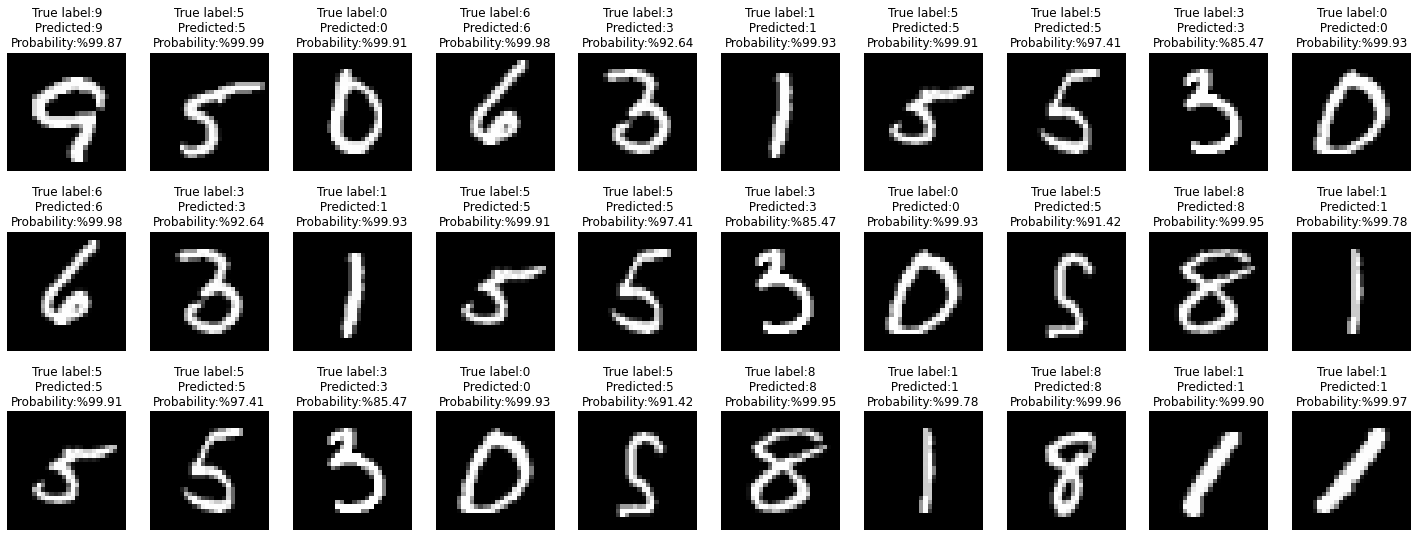

In [ ]:
import numpy as np
from tensorflow.nn import softmax
num_samples=30
random_indices=np.random.choice(len(x_test), num_samples, replace=False)     
fig, ax_arr = plt.subplots(3,10,figsize=(20,6))

for i in range(ax_arr.shape[0]):
    for j in range(ax_arr.shape[1]):
        idx = random_indices[i*ax_arr.shape[0]+j]
        ax_arr[i,j].imshow(x_test[idx].reshape(28,-1), cmap="gray")
        output = model.predict(x_test[idx].reshape(1,-1),verbose=0)
        prediction = np.argmax(output)
        probability = 100*softmax(output)[0,prediction]
        ax_arr[i,j].set_title(f"True label:{y_test[idx]}\n Predicted:{prediction}\nProbability:%{probability:.2f}")
        ax_arr[i,j].axis("off")
plt.subplots_adjust(top=1.3,right=1.1)


 